# INFO
### Detta är då en kod från https://betterprogramming.pub/creating-topographic-maps-in-python-convergence-of-art-and-data-science-7492b8c9fa6e
### Där jag hämtade datan ifrån https://ec.europa.eu/eurostat/web/gisco/geodata/reference-data/elevation/copernicus-dem/elevation

In [5]:
import rasterio

file = rasterio.open('10_DEM_y50x10.tif')
file2 = rasterio.open('10_DEM_y60x10.tif')
dataset = file.read()
dataset2 = file2.read()
print(dataset.shape)
print(dataset2.shape)

(1, 12001, 8001)
(1, 12001, 6001)


In [6]:
import os

dem1_path = os.path.join("10_DEM_y50x10.tif")
dem2_path = os.path.join("10_DEM_y60x10.tif")
with rasterio.open(dem1_path) as src1:
    dem1 = src1.read(1, masked=True)
    transform1 = src1.transform
    crs1 = src1.crs

with rasterio.open(dem2_path) as src2:
    dem2 = src2.read(1, masked=True)
    transform2 = src2.transform
    crs2 = src2.crs

In [7]:
from rasterio.merge import merge

mosaic, out_trans = merge([rasterio.open(dem1_path), rasterio.open(dem2_path)])

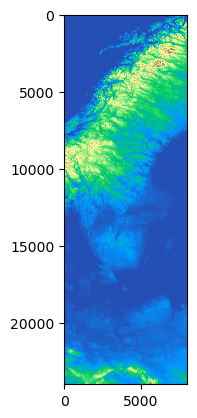

<AxesSubplot: >

In [8]:
from rasterio.plot import show

show(mosaic, cmap='terrain')

In [10]:
import tifffile as tiff

image_array = mosaic
tiff.imsave('output.tif', image_array)

C:\Users\olive\AppData\Local\Temp\ipykernel_50112\1181652727.py:4: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tiff.imsave('output.tif', image_array)


C:\Users\olive\anaconda3\lib\site-packages\rasterio\__init__.py:331: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


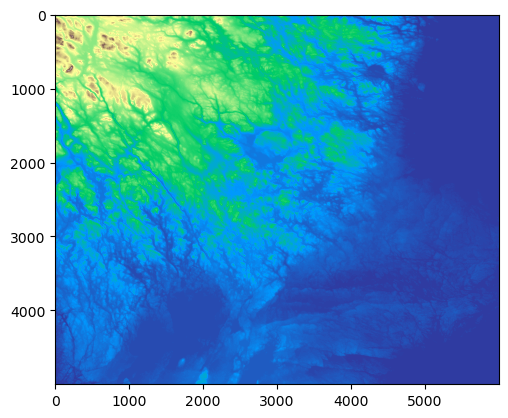

<AxesSubplot: >

In [45]:
from shapely.geometry import box
from rasterio.mask import mask

bbox = box(7000, 14000, 1000, 9000) #xmin, ymin, xmax, ymax

with rasterio.open('output.tif') as src:
    out_image, out_transform = mask(src, [bbox], crop=True)
    out_meta = src.meta.copy()

show(out_image, cmap='terrain')

In [46]:
cropped_tiff = out_image

tiff.imsave('cropped.tif', cropped_tiff)

C:\Users\olive\AppData\Local\Temp\ipykernel_50112\3282060940.py:3: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tiff.imsave('cropped.tif', cropped_tiff)


In [47]:
print('Min = ' + str(cropped_tiff.min()) + '     Max = ' + str(cropped_tiff.max()))

Min = -20.936323     Max = 1737.9147


In [48]:
file3 = rasterio.open('cropped.tif')
dataset3 = file3.read()

C:\Users\olive\anaconda3\lib\site-packages\rasterio\__init__.py:331: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


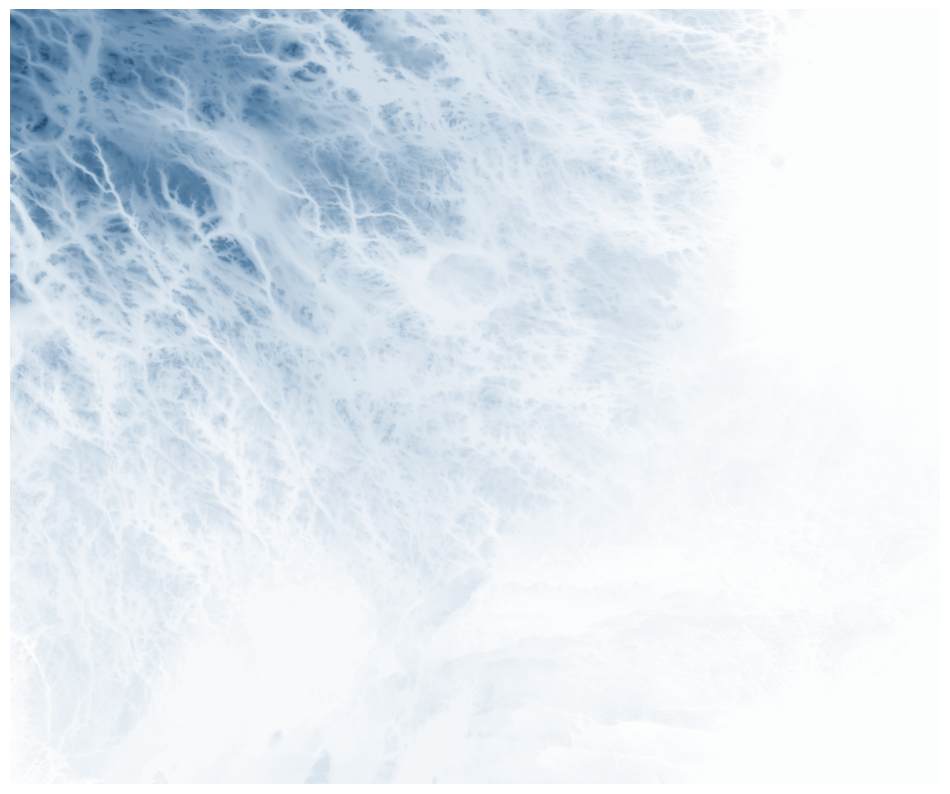

In [49]:


import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors

norm = colors.Normalize(vmin=-3.5, vmax=2081)

value_range = 256

#Enter the hex codes of your desired colors here!
iceland_colormap = LinearSegmentedColormap.from_list('iceland', ['#ffffff','#CCDBE8', '#6088AB', '#305B80', '#223F59'], N=value_range)


fig = plt.figure(facecolor='#ffffff')
fig.set_size_inches(12, 12)
ax = plt.axes()
plt.imshow(dataset3[0], cmap=iceland_colormap)
ax.axis('off')
plt.show()

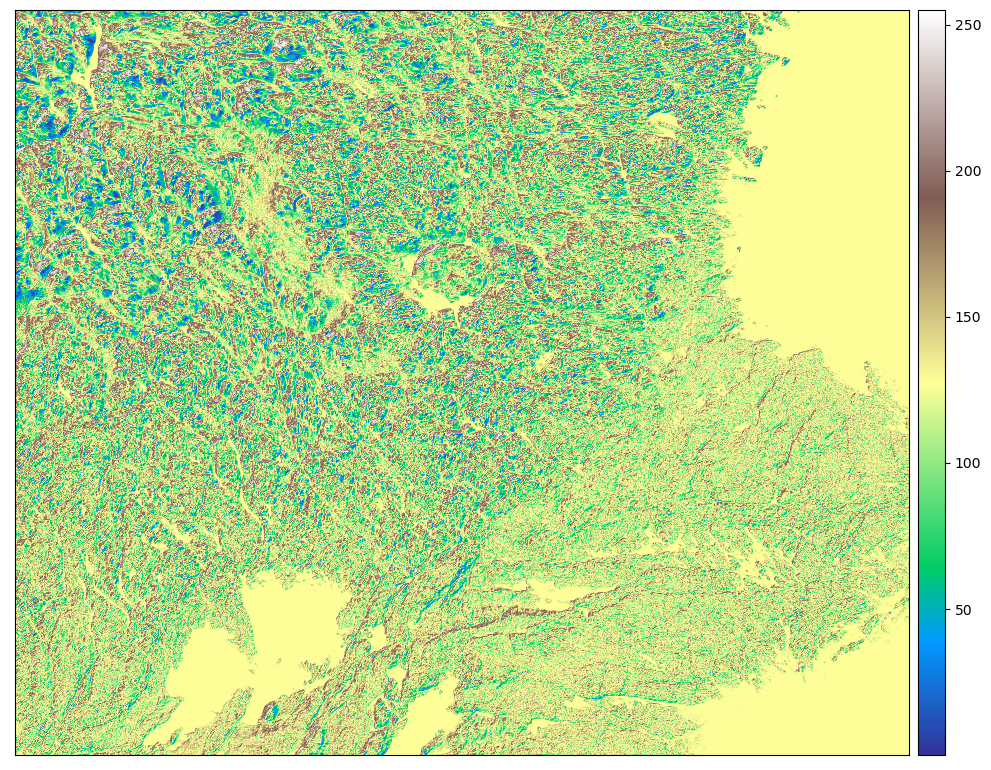

In [53]:
import earthpy.spatial as es
import earthpy.plot as ep

hillshade = es.hillshade(dataset3[0], azimuth=315, altitude=0)

ep.plot_bands(hillshade, cmap='terrain')
plt.show()

In [58]:
print(dataset3.shape)
print(dataset3[0])

(1, 5000, 6000)
[[606.0605  606.0589  606.0589  ...   0.        0.        0.     ]
 [608.08624 607.67206 607.67206 ...   0.        0.        0.     ]
 [608.22064 608.7193  608.7193  ...   0.        0.        0.     ]
 ...
 [  0.        0.        0.      ...   0.        0.        0.     ]
 [  0.        0.        0.      ...   0.        0.        0.     ]
 [  0.        0.        0.      ...   0.        0.        0.     ]]
